### Normal Equation on equity price (GOOGL and AMZN) time series

In [1]:
import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from alpha_vantage.timeseries import TimeSeries
api_key = 'C98CEUQBPZ9L15IV'
ts = TimeSeries(key=api_key, output_format='pandas')
GOOG, meta_data = ts.get_daily(symbol='GOOG', outputsize="compact")
AMZN, meta_data = ts.get_daily(symbol='AMZN', outputsize="compact")
X_train = np.array([GOOG['close'].values]).T
y_train = np.array([AMZN['close'].values]).T

### $\begin{vmatrix}
2.5\\
\end{vmatrix}$

### $\hat{y} = w\mathbf{X}$

In [3]:
weight = np.array([2.5])
y_hat = weight * X_train

### $\nabla_{w}MSE_{train} = 0$

### $\to \nabla_{w}\frac{1}{m}||\hat{y}^{train}-y^{train}||_2^2 = 0$

### $\to \frac{1}{m}\nabla_{w}||\mathbf{X}^{train}w-y^{train}||_2^2 = 0$

In [4]:
m = len(X_train)
c = 1 / m
summed_error = 0
for i in range(0, m):
    err = np.linalg.norm(y_train[i] - y_hat[i])**2
    summed_error += err
MSE = c * summed_error

#### The normal equation solves for parameter theta

### $X^Ty = X^TX\theta$

### $(XX^T)^{-1}X^Ty = (XX^T)^{-1}X^TX\theta$

### $\theta = (X^TX)^{-1}X^Ty$


In [5]:
optimal_weight = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T.dot(y_train))
optimal_weight

array([[ 1.12169625]])

#### With $\theta$ $\approx 1.1216$, we can plot the gradient and compare minimum 

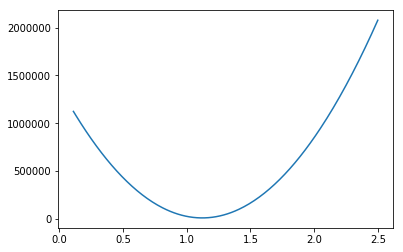

In [6]:
cost_function = []
m = len(X_train)
c = 1 / m
weights = np.array([np.arange(2.5, 0.1, -0.01)]).T
for weight in weights:
    y_hat = weight * X_train
    summed_error = 0
    for i in range(0, m):
        err = np.linalg.norm(y_train[i] - y_hat[i])**2
        summed_error += err
    MSE = c * summed_error
    cost_function.append(MSE)
plt.plot(weights, cost_function)
plt.show()